# Notebook 3:  Agrupamiento Jerárquico y Redes de Kohonen 
En este notebook vamos a implementar dos algoritmos de clustering: el agrupamiento jeráquico  de clustering y los mapas autoorganizados (SOM) o redes de Kohonen en R. El objetivo es entender como funcionan estos algoritmos y  aprender a utilizarlos con un ejemplo simple. Recuerde instalar previamente el paquete kohonen en R.



**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

In [1]:
#help(hclust)

In [2]:
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//milk1.dat",row.names=1,dec=".",header=TRUE)
datos <- as.data.frame(datos)
dim(datos)
summary(datos)

[1] 25  5

     WATER          PROTEIN            FAT           LACTOSE     
 Min.   :44.90   Min.   : 0.600   Min.   : 1.00   Min.   :0.000  
 1st Qu.:71.30   1st Qu.: 3.000   1st Qu.: 3.40   1st Qu.:2.700  
 Median :82.00   Median : 5.900   Median : 6.30   Median :4.700  
 Mean   :78.18   Mean   : 6.212   Mean   :10.31   Mean   :4.132  
 3rd Qu.:87.70   3rd Qu.: 9.700   3rd Qu.:13.10   3rd Qu.:5.600  
 Max.   :90.40   Max.   :12.300   Max.   :42.00   Max.   :6.900  
      ASH        
 Min.   :0.1000  
 1st Qu.:0.5300  
 Median :0.8000  
 Mean   :0.8632  
 3rd Qu.:1.1000  
 Max.   :2.3000  

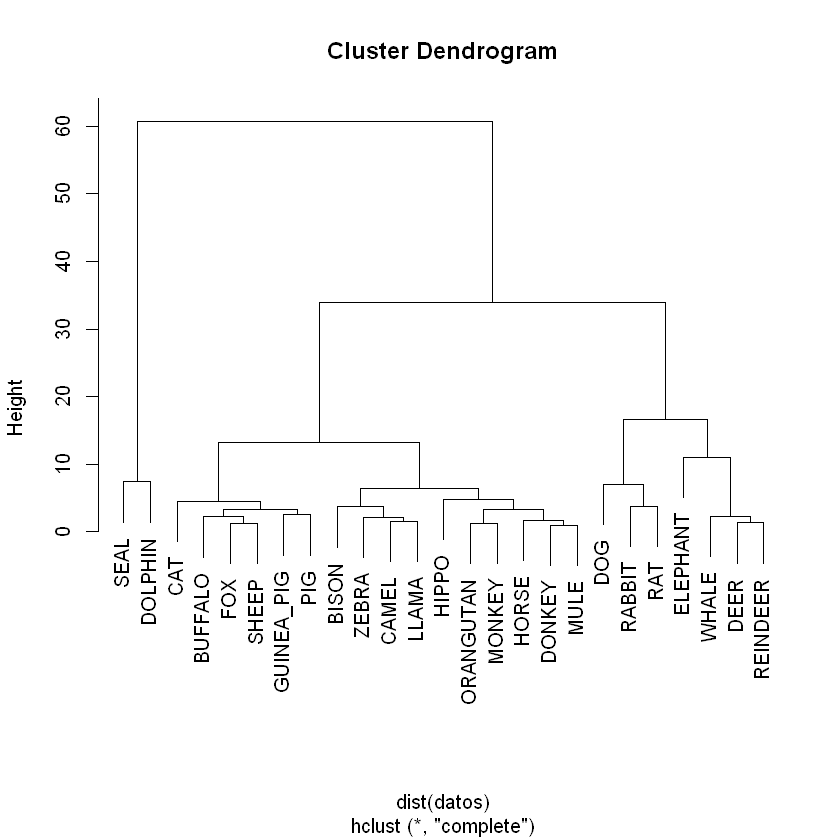

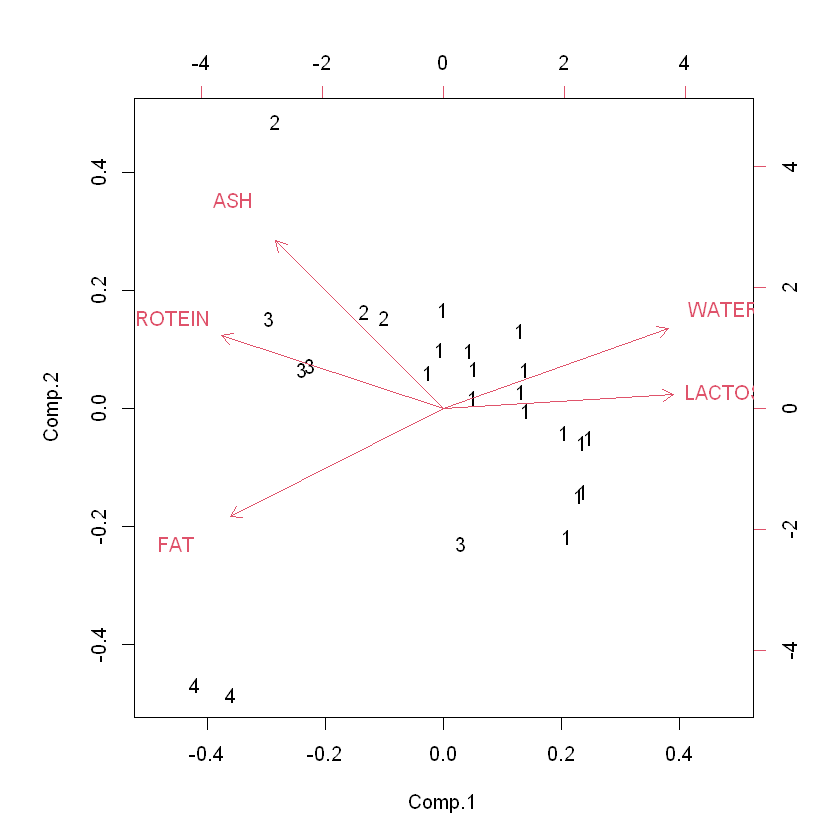

In [3]:
res3 <- hclust(dist(datos))
plot(res3)
res <- princomp(datos, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 1:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 


#### Repuesta 1.a
Este método realiza un análisis de conglomerados jerárquico utilizando un conjunto de disimilitudes, es una técnica de análisis de datos que agrupa objetos en una estructura de tipo árbol binario llamada dendrograma, la cual permite descubrir estructuras de similitud entre observaciones y representarlas jerárquicamente. Inicialmente, cada observación va a representar a un grupo y, a continuación, el algoritmo procede iterativamente, uniendo en cada etapa las observaciones, hasta que solo queda un grupo.

Los parametros de entrada principales son:
- d: objeto de clase dist que representa la matriz de disimilitudes entre observaciones
- method: método de enlace para formar los clústeres. (complete, single, average, ward.D, ward.D2, mcquitty, median, centroid)
- members: vector numérico con el tamaño de cada objeto si no todos representan una única observación, proporciona la identificación de grupos iniciales. De esta forma, el algoritmo de conglomerados jerárquico puede iniciarse en medio del dendrograma

La salida tiene lo siguiente:
- merge: Es una matriz de (n-1) por 2, indica qué grupos se fusionaron en cada paso.
- height: valor con la altura (distancia) en la que se hicieron las fusiones.
- order: vector que indica el orden en que deben disponerse las hojas del dendrograma para evitar cruces.
- labels: etiquetas de las observaciones.
- method: el método de agrupamiento que se ha utilizado.
- calls: la llamada que produjo el resultado.
- dist.method: método utilizado para calcular las distancias.

#### Repuesta 1.b
El primer dendograma muestra un agrupamiento jerárquico de animales basado en similitud nutricional (grasa, proteina, agua, etc). El dendograma muestra como los animales se agrupan progresivamente en grupos a distintas alturas. En donde los grupos cercanos, que están más abajo en el dendograma tiene composiciones nutricionales más similares. Por ejemplo, "seal" y "dolphin" estan muy alejados de otros animales, lo que puede decir que tienen perfiles nutricionales muy distintos al resto.

En el bitplot, muestra la proyección de los datos sobre los dos primeros componentes principales, en donde se utilizaron 4 grupos o clústeres como lo indica el método, y los numeros 1,2,3,4 indican a que grupo pertenece cada observación.

#### Respuesta 1.c

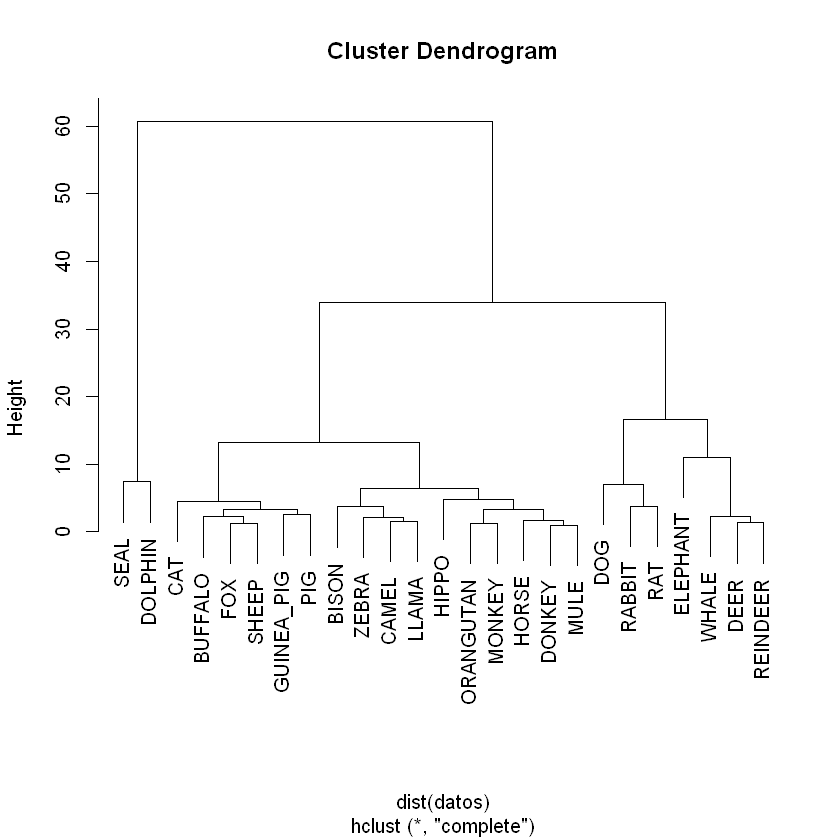

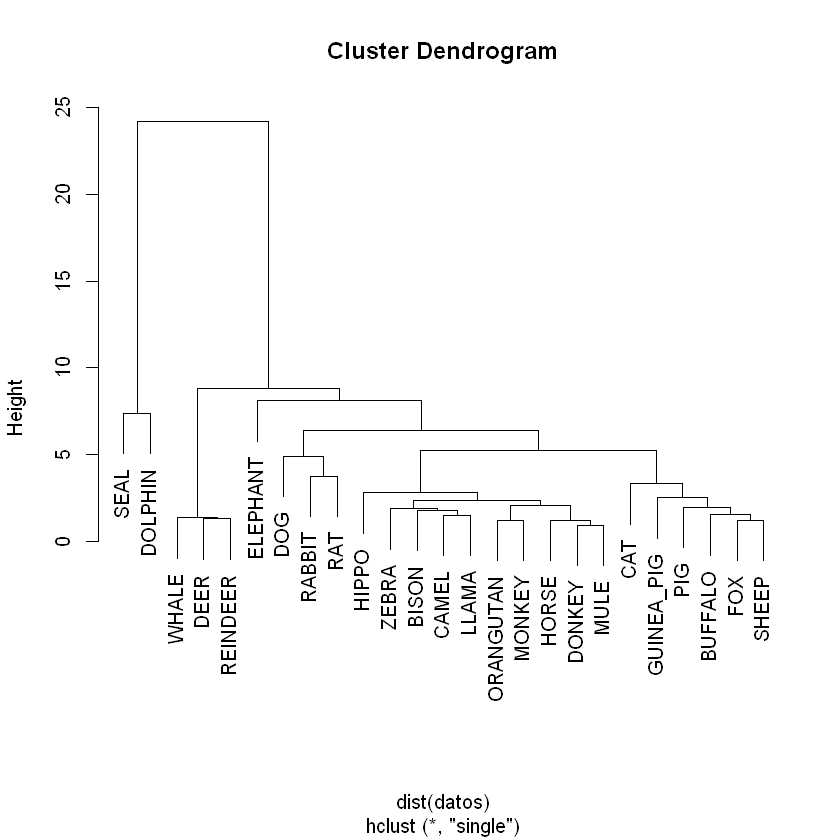

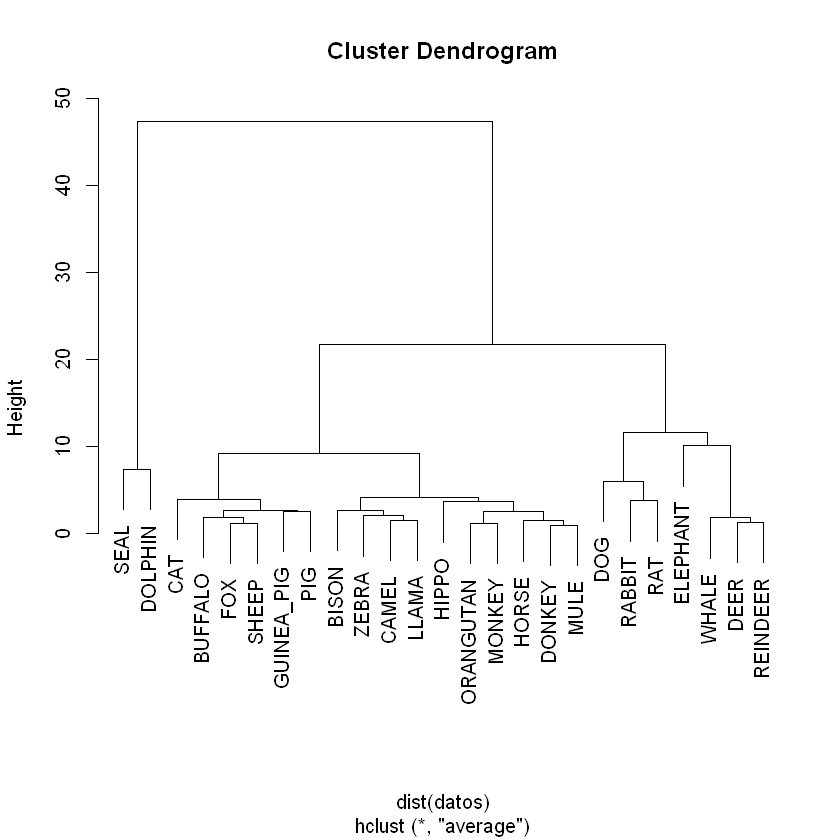

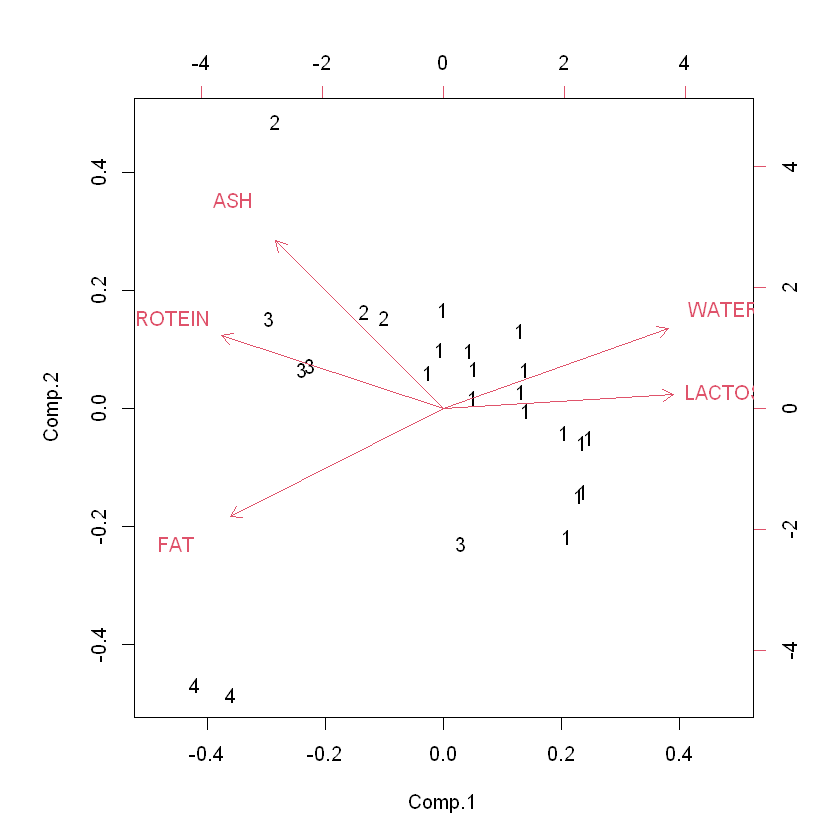

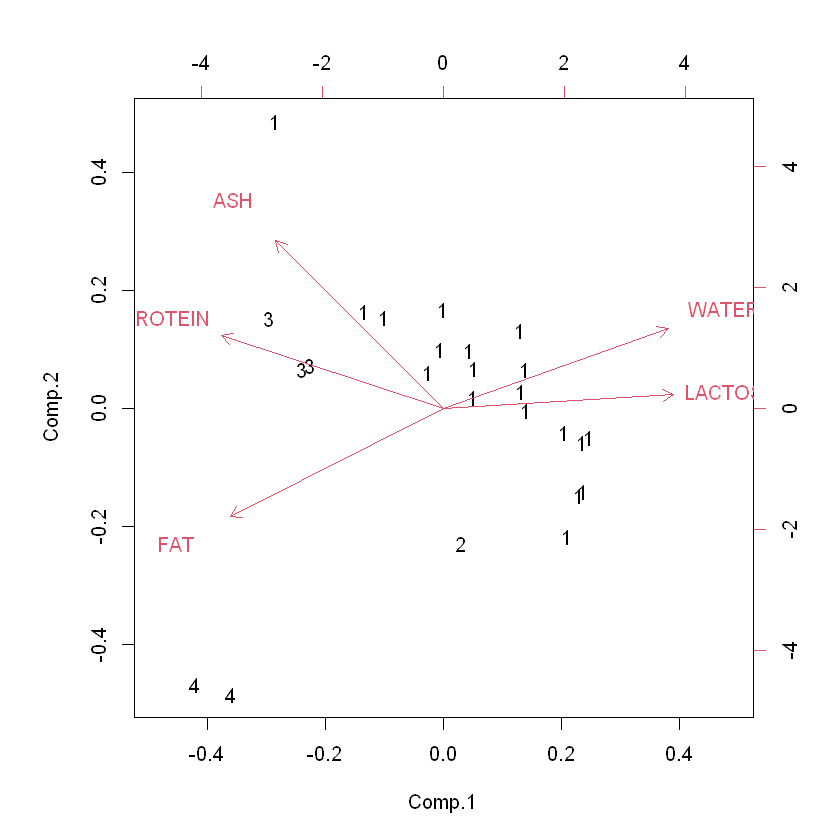

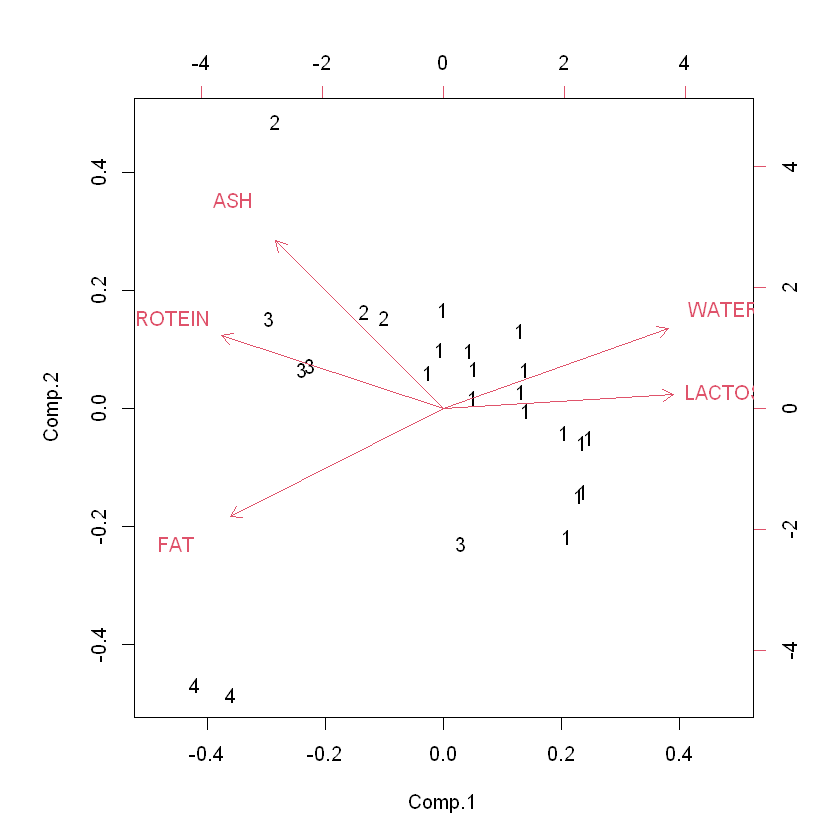

In [4]:
#Distintos parametros de metodos: Single y average
res4 <- hclust(dist(datos),method="single")
res5 <- hclust(dist(datos),method="average")
plot(res3)
plot(res4)
plot(res5)
biplot(res, xlabs= cutree(res3,4))
biplot(res, xlabs= cutree(res4,4))
biplot(res, xlabs= cutree(res5,4))

Para el conjunto de datos, se observan diferencias entre los distintos métodos, con el método single se ven que estan los grupos menos concentrados, a comparación con los métodos complete y average (el método complete viene por defecto en hclust, sino se le especifica), con estos dos últimos métodos, se observan grupos más concentrados.

**A continuación instalamos la biblioteca kohonen para utilizar som, el método de mapas autoorganizados que permite realizar un análisis de agrupamiento**

In [5]:
#install.packages("kohonen")
library(kohonen)
set.seed(7)

[[1]]
        WATER    PROTEIN        FAT     LACTOSE         ASH
V1 -2.5356874  1.0729314  2.6899058 -2.02042124 -0.32965999
V2 -0.7799697  1.2599683  0.6351271 -0.96937503  1.62080612
V3  0.1782588  0.2255258 -0.2440329  0.02172521  0.05902769
V4  0.8071564 -0.9927413 -0.7233456  0.86466273 -0.73162491



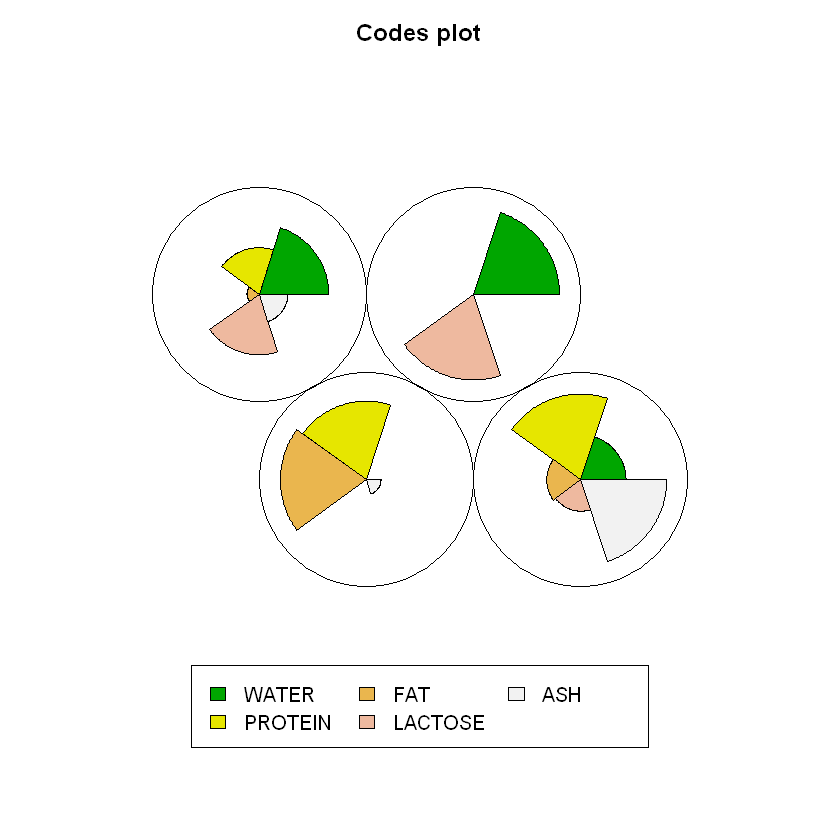

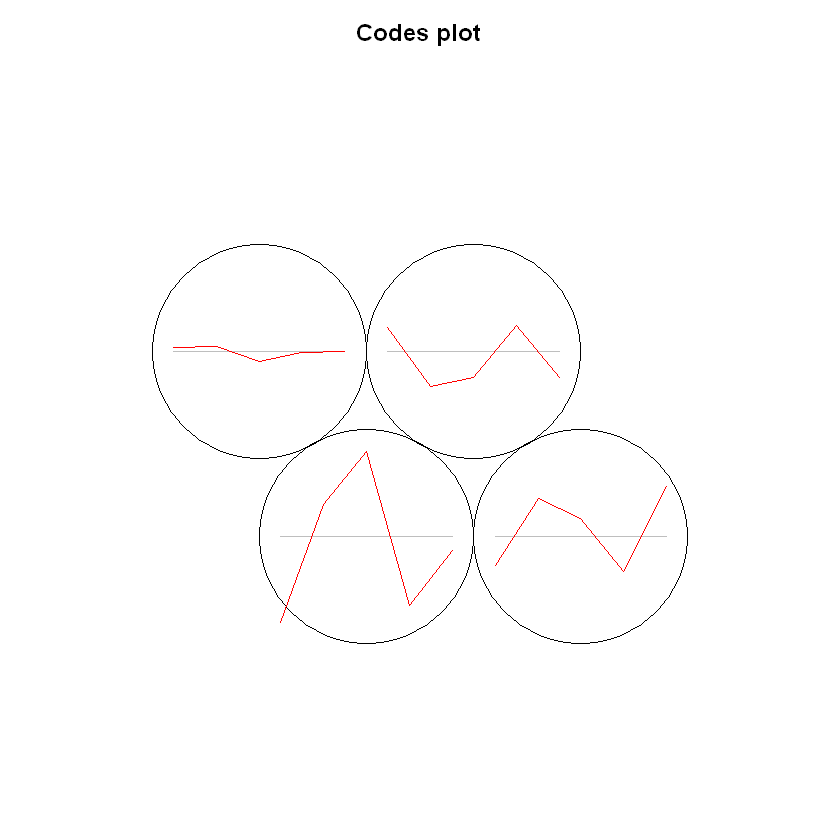

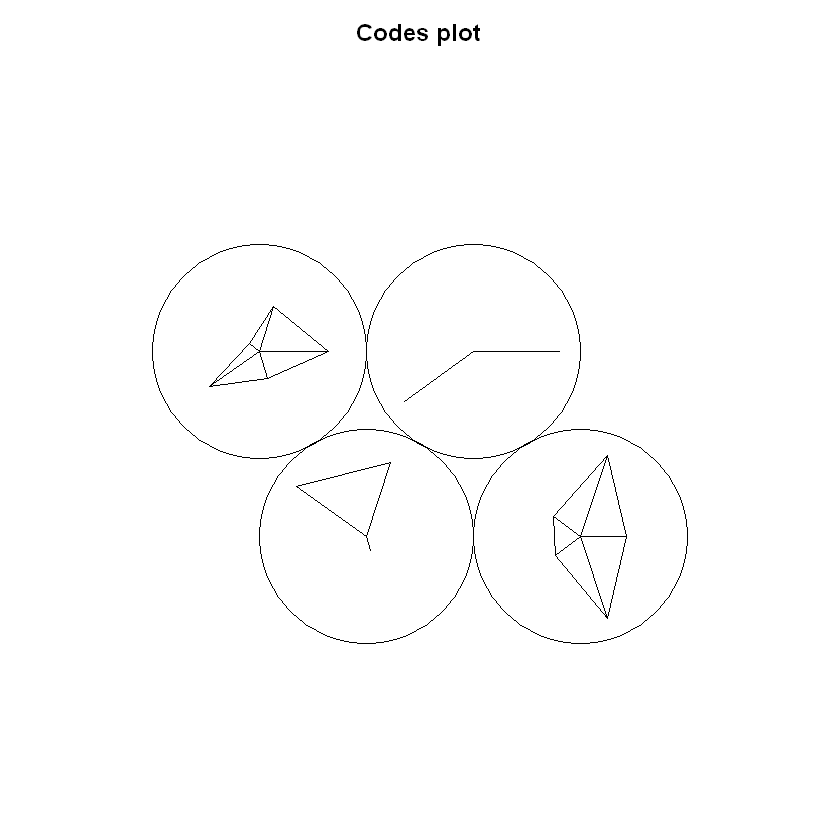

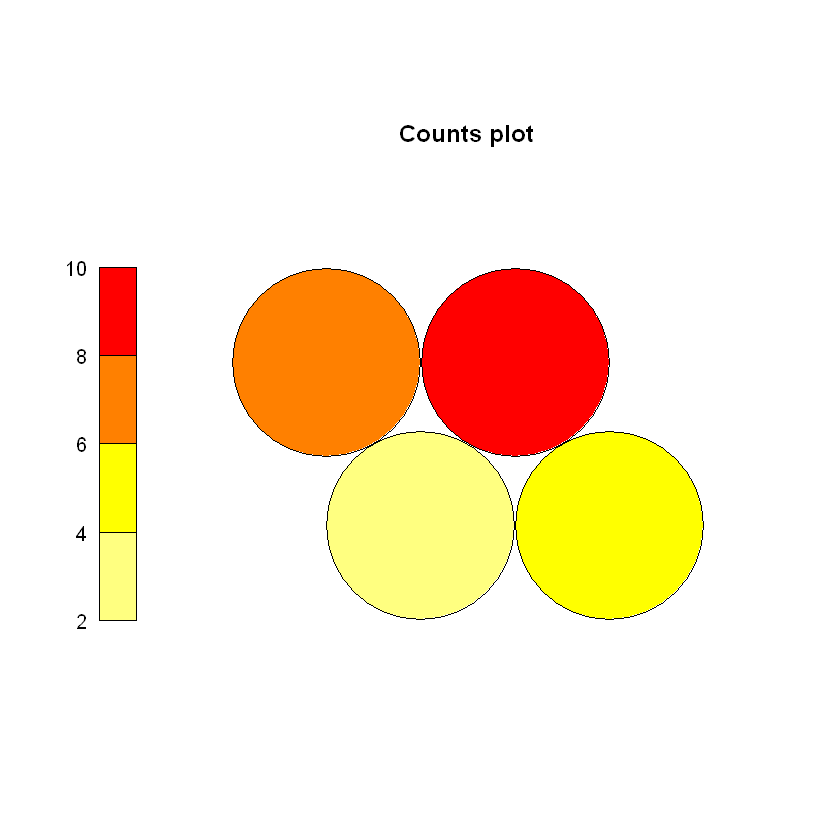

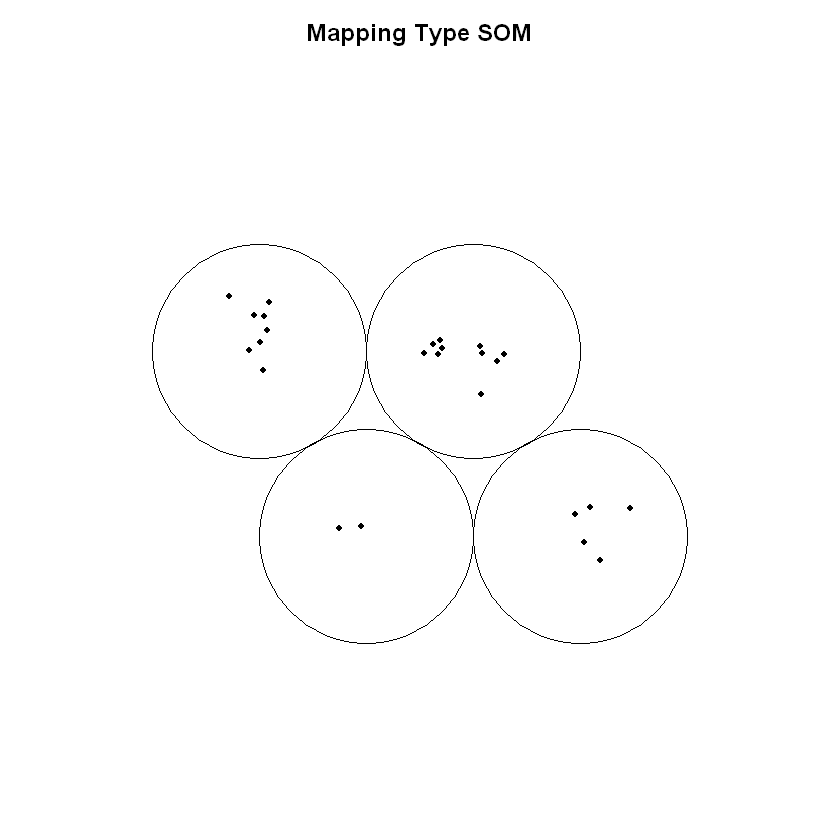

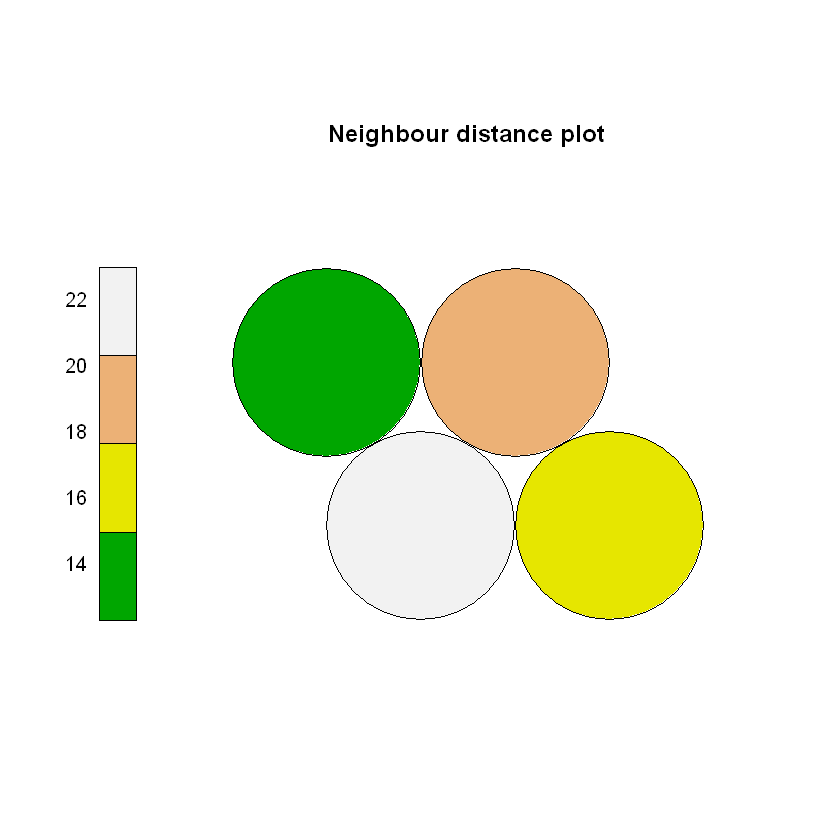

In [6]:
#create SOM grid
sommap <- som(scale(datos), rlen=1000, grid = somgrid(2, 2, "hexagonal"))
print(sommap$codes)
plot(sommap,  codeRendering="segments")
plot(sommap,  codeRendering="lines")
plot(sommap,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)



**Ejercicio 2:** 

a) Explique como funciona el método som, describa parámetros de entrada y salida y los gráficos obtenidos.

b) Modifique parámetros de entrada. Interprete y comente los resultados obtenidos. 

c) Compare estos resultados con los del agrupamiento jerárquico. Discuta sus resultados.

In [7]:
#help(som)
str(sommap) #Para ver la estructura de sommap, por lo tanto los paramétros de salida

List of 14
 $ data            :List of 1
  ..$ : num [1:25, 1:5] 0.93 0.805 0.797 0.945 0.953 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : chr [1:25] "HORSE" "ORANGUTAN" "MONKEY" "DONKEY" ...
  .. .. ..$ : chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
  .. ..- attr(*, "scaled:center")= Named num [1:5] 78.184 6.212 10.308 4.132 0.863
  .. .. ..- attr(*, "names")= chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
  .. ..- attr(*, "scaled:scale")= Named num [1:5] 12.818 3.653 10.518 1.832 0.505
  .. .. ..- attr(*, "names")= chr [1:5] "WATER" "PROTEIN" "FAT" "LACTOSE" ...
 $ unit.classif    : num [1:25] 4 4 4 4 4 4 4 3 3 3 ...
 $ distances       : num [1:25] 0.54 0.388 0.537 0.198 1.471 ...
 $ grid            :List of 6
  ..$ pts              : num [1:4, 1:2] 1.5 2.5 1 2 0.866 ...
  .. ..- attr(*, "dimnames")=List of 2
  .. .. ..$ : NULL
  .. .. ..$ : chr [1:2] "x" "y"
  ..$ xdim             : num 2
  ..$ ydim             : num 2
  ..$ topo             : chr "hexagonal"
  ..$ n

#### Respuesta 2.a
El método SOM es una técnica de reducción de dimensionalidad y agrupamiento no supervisado desarrollada por Teuvo Kohonen. SOM nos permite representar datos multidimensionales en espacios de menor dimensión. El método SOM utiliza el algoritmo de Autoorganización no supervisado para organizar los datos de entrada de forma que elementos similares queden cercanos en un mapa de menor dimensión, manteniendo la estructura topológica de los datos originales.

Los paramétros de entrada son:
- data: matriz o data frame con los datos numéricos (ya normalizados o escalados).
- grid: estructura del mapa.
- rlen: número de iteraciones de entrenamiento.
- alpha: tasa de aprendizaje.
- radius: vecindad inicial para el entrenamiento.

Las salidas son:
- unit.classif: es un vector que indica en que nodo fue clasificada cada observación del dataset.
- distances: es la distancia entre cada dato y el nodo al que fue asignado.
- grid: es la estructura del mapa SOM, el cómo están organizados los nodos.
- codes: son los pesos (vectores de características) de cada nodo.
- changes: un vector con la media de las distancias de ajuste de pesos por iteración durante el entrenamiento.

Los gráficos obtenidos:
1. Es una visualización de los codes, utilizando la representación de segment, lo que es bueno para ver la contribución individual de cada variable en términos de magnitud y dirección.
2. Es una visualización de los codes, utilizando la representación de lines, que es útil para comparar los perfiles generales entre los nodos.
3. Es una visualización de los codes, utilizando la representación de stars, que permite comparar los valores de todas las variables para cada nodo.
4. Muestra la cantidad de datos asignados a cada nodo.
5. Muestra en que nodo quedo mapeado cada dato.
6. Muestra la distancia entre vectores de peso de nodos vecinos.

#### Respuesta 2.b

Decidimos cambiar el tamaño del grid, a uno de 3x3 de forma rectangular, lo que llevo a generar un total de 9 nodos, haciendo que las observaciones se distribuyeran entre más nodos permitiendo una mayor discriminación entre observaciones y formando agrupamientos más rigidos. Además decidimos podemos ver que en sommap donde el grid es de 2x2, se logra una convergencia  con valores cercanos a las 100 iteraciones, en cambio cuando el grid es de 3x3 el número de iteraciones para ir convergiendo aumenta a poco menos de 600 iteraciones. Esto puede deberse a que al tener un mayor número de nodos se requiere un mayor ajuste de los pesos para representar correctamente la estructura de los datos.

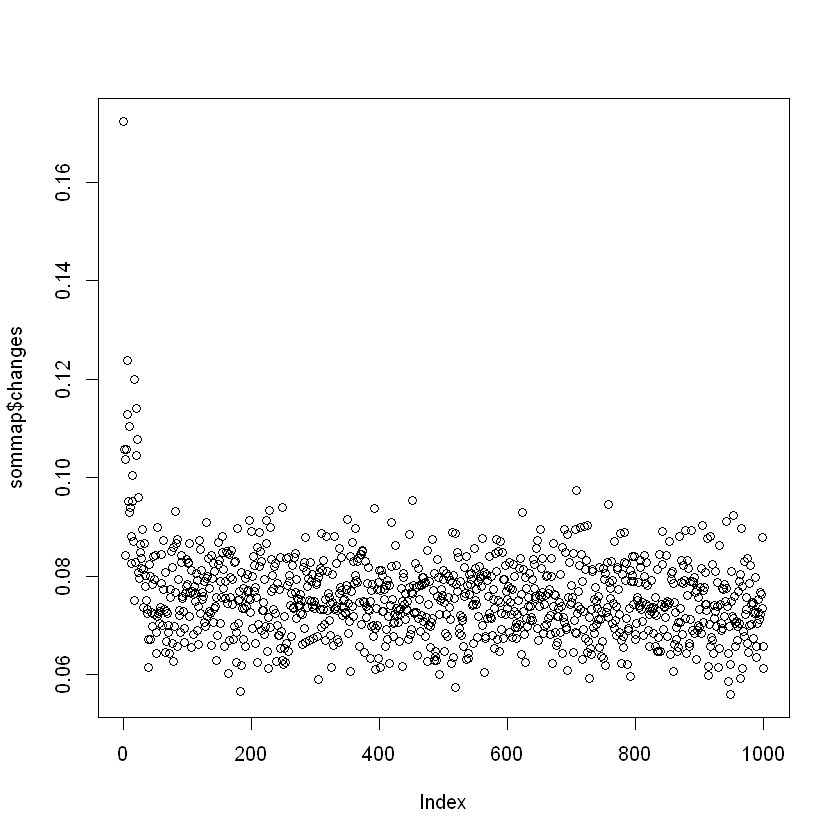

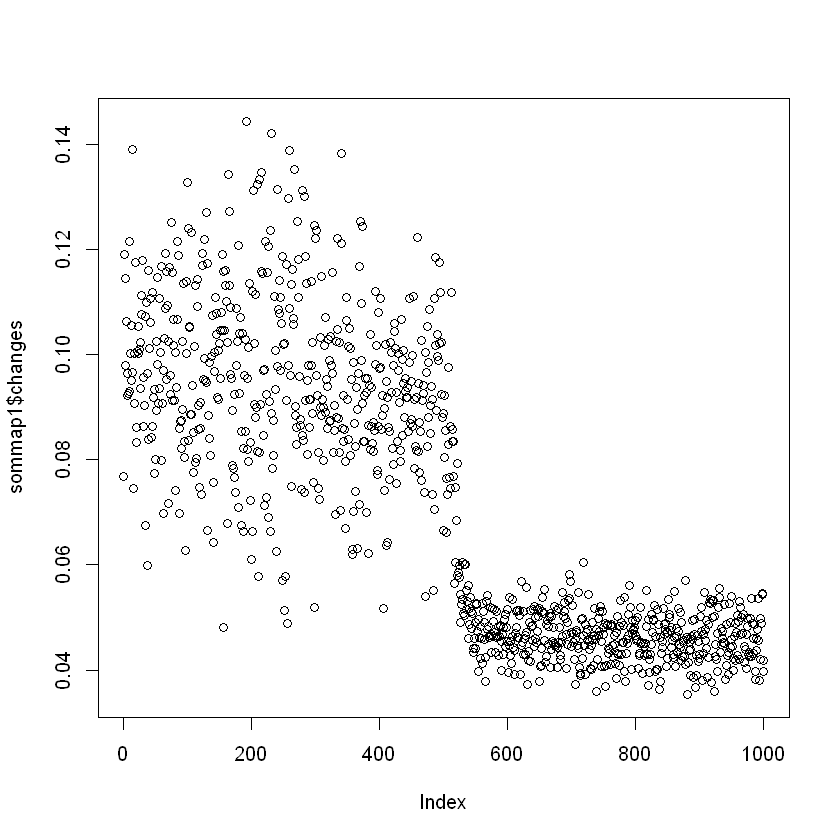

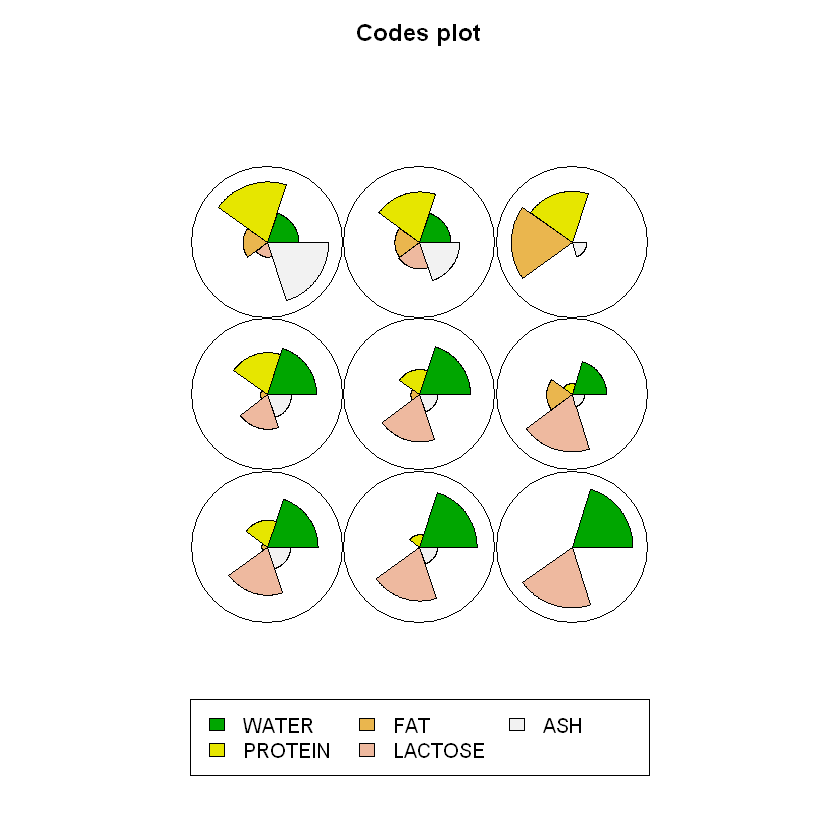

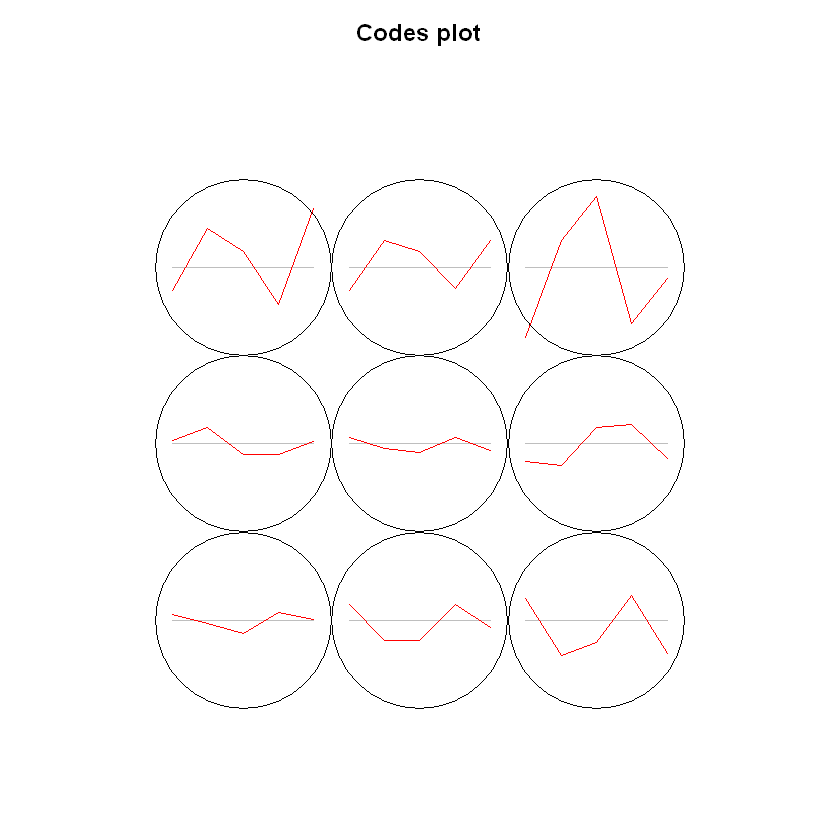

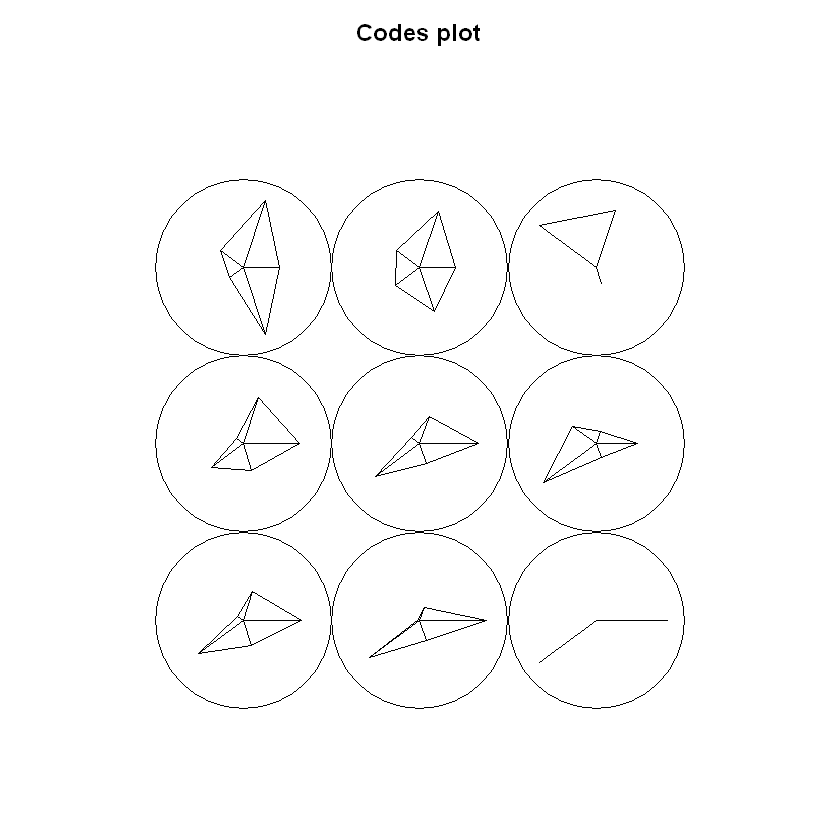

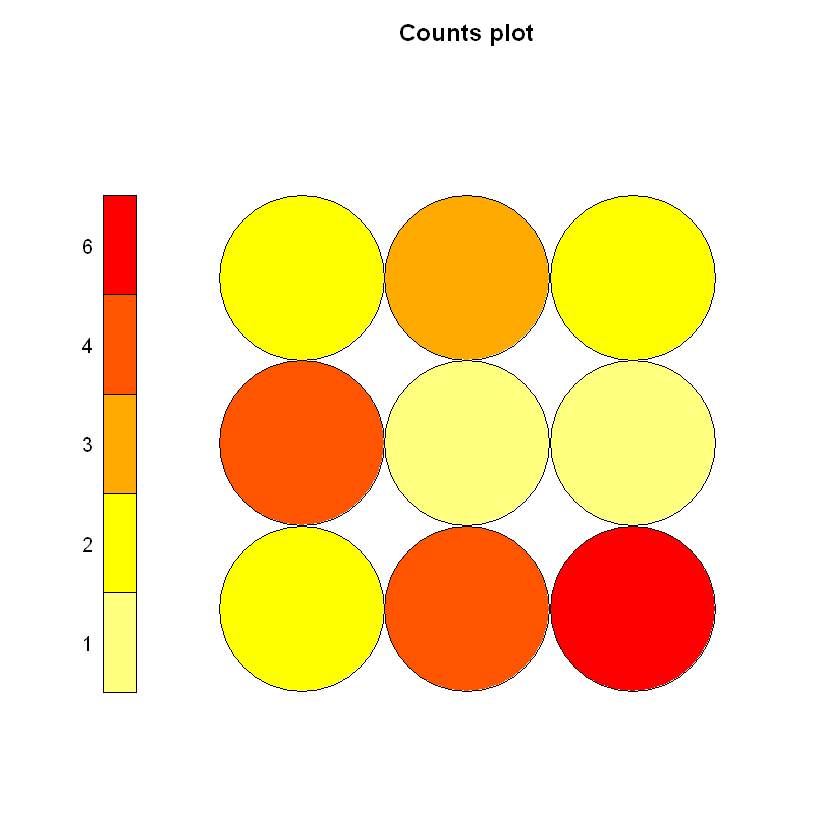

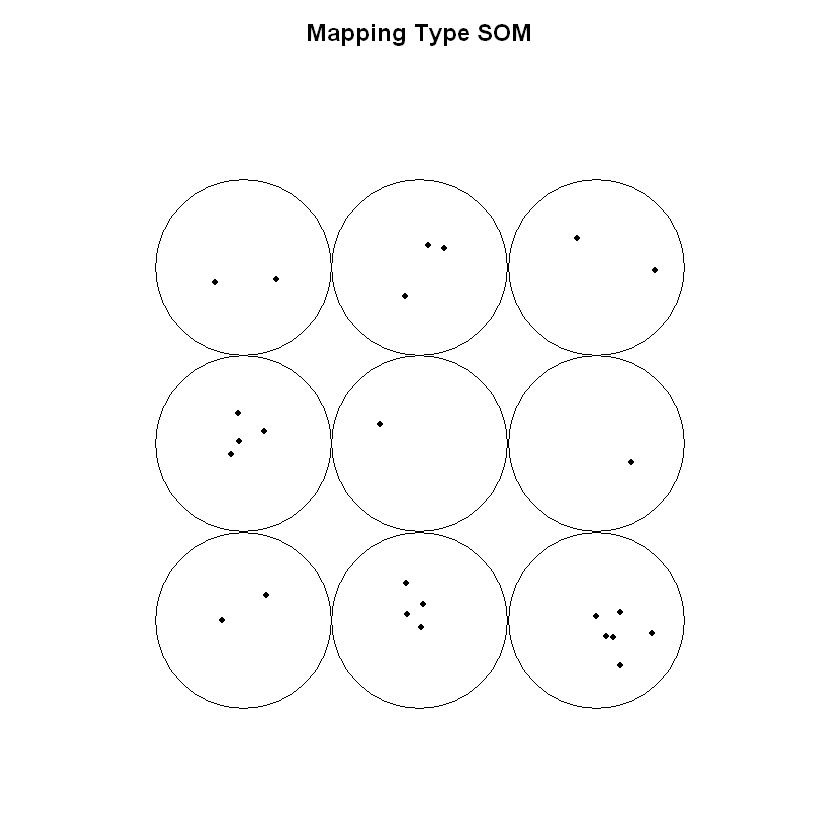

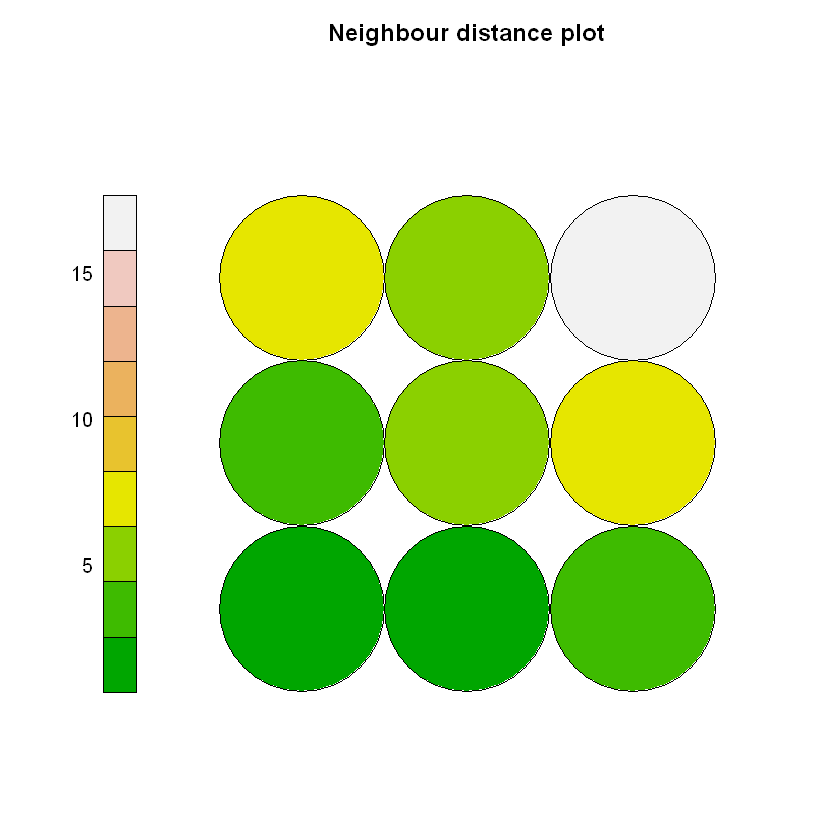

In [8]:
#create SOM grid
sommap1 <- som(scale(datos), rlen=1000, grid = somgrid(3, 3, "rectangular"))

plot(sommap$changes)
plot(sommap1$changes)

plot(sommap1,  codeRendering="segments")
plot(sommap1,  codeRendering="lines")
plot(sommap1,  codeRendering="stars")

colors <- function(n, alpha = 1) {
    rev(heat.colors(n, alpha))
}

plot(sommap1, type = "counts", palette.name = colors, heatkey = TRUE)

plot(sommap1, type = "mapping", pchs = 20, main = "Mapping Type SOM")

plot(sommap1, type = "dist.neighbours", palette.name = terrain.colors)

**Ejercicio 3:**

Considere el subconjunto de datos del archivo tiposMusica.csv que ha estudiado en las tareas anteriores. 

a) Escoja dos de los cuatro métodos de agrupamiento estudiado en esta unidad y realice un análisis de agrupamiento con estos datos. 

b) Compare sus resultados con la medida de calidad de su preferencia y considerando la etiqueta del tipo de música disponible en la primera columna de datos. Discuta sus resultados.

[1] 149  11

   popularity     acousticness       danceability     duration_ms    
 Min.   : 0.00   Min.   :0.000051   Min.   :0.0685   Min.   : 31787  
 1st Qu.:29.00   1st Qu.:0.175000   1st Qu.:0.2570   1st Qu.:141787  
 Median :41.00   Median :0.816000   Median :0.3770   Median :210960  
 Mean   :38.83   Mean   :0.609778   Mean   :0.3926   Mean   :219232  
 3rd Qu.:53.00   3rd Qu.:0.983000   3rd Qu.:0.5040   3rd Qu.:262773  
 Max.   :74.00   Max.   :0.996000   Max.   :0.8650   Max.   :865940  
     energy        instrumentalness     liveness         loudness      
 Min.   :0.00211   Min.   :0.00000   Min.   :0.0504   Min.   :-46.122  
 1st Qu.:0.07260   1st Qu.:0.00315   1st Qu.:0.0995   1st Qu.:-24.606  
 Median :0.25500   Median :0.47500   Median :0.1150   Median :-14.592  
 Mean   :0.35131   Mean   :0.45033   Mean   :0.1789   Mean   :-17.134  
 3rd Qu.:0.59700   3rd Qu.:0.89300   3rd Qu.:0.1570   3rd Qu.: -9.127  
 Max.   :0.97700   Max.   :0.95800   Max.   :0.9720   Max.   : -0.747  
  spee

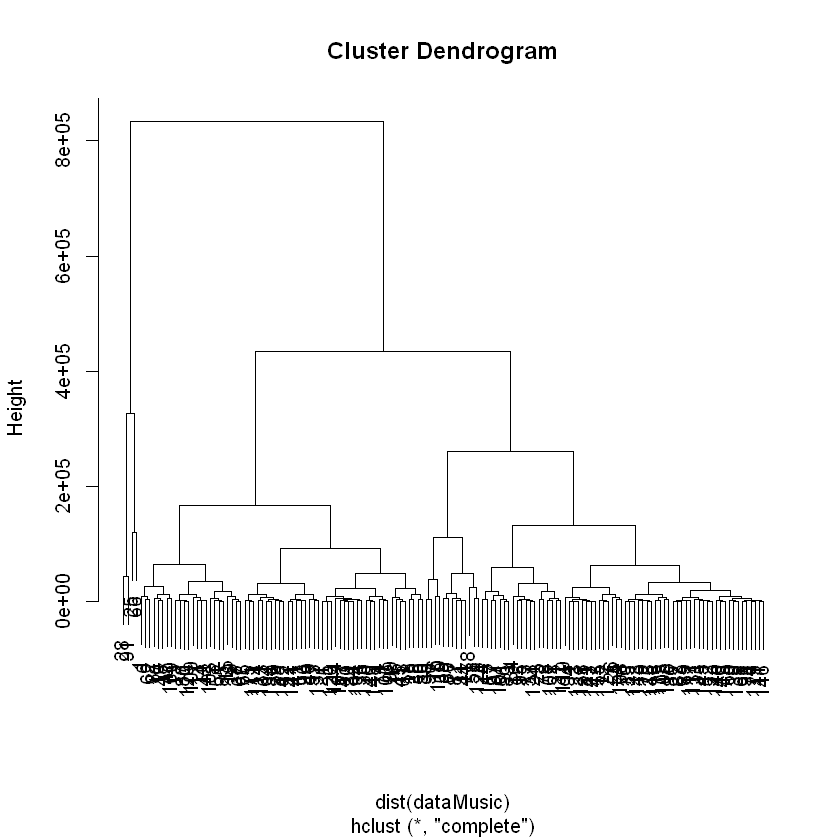

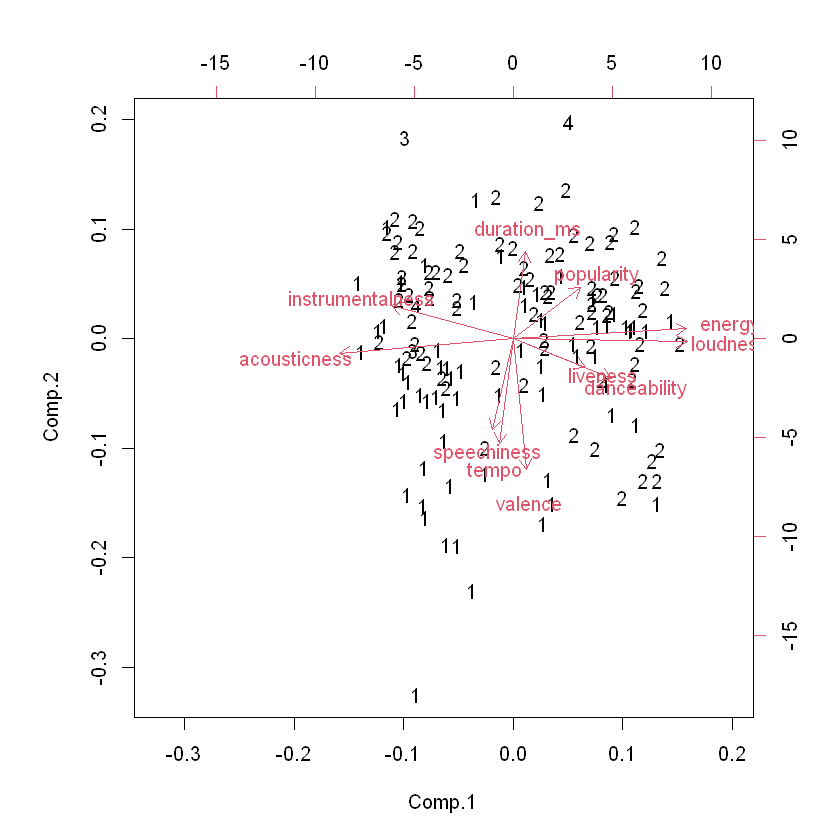

In [11]:
dataMusic <- read.csv("..//data//tiposMusica.csv",header=TRUE,sep=";",dec=".")

dataMusic <- dataMusic[, 4:14]
dataMusic <- as.data.frame(dataMusic)
dim(dataMusic)
summary(dataMusic)
res3 <- hclust(dist(dataMusic))
plot(res3)
res <- princomp(dataMusic, cor=TRUE)
biplot(res, xlabs= cutree(res3,4))

### 3.1 Metodos de agrupamiento
Los metodos elegidos para el desarrollo de elejercicio 3 de son:
- K-means
- Redes de Kohonen

### K-Mean

### Redes de Kohonen

[[1]]
    popularity acousticness danceability duration_ms     energy
V1  0.26878826   -0.7483150   -0.2633442 -0.06227589  0.8464123
V2  0.37477565   -0.8800142    0.5444476  0.16864351  0.8156036
V3  0.05618408    0.3447290   -0.2889998  0.52182733 -0.4226896
V4 -0.40507641    0.8205214   -0.2821080 -0.19214202 -0.8076140
   instrumentalness   liveness   loudness speechiness       tempo     valence
V1       -0.7319287  2.7356970  0.6819487  0.07220358  0.44553726  0.35477168
V2       -0.5527727 -0.1500089  0.8381849 -0.30990405 -0.32170482 -0.05276953
V3        0.2465373 -0.2779423 -0.1850999  3.16216616  0.84651935  0.29256942
V4        0.5609462 -0.3032892 -0.8816466 -0.24257312 -0.07072101 -0.04281124



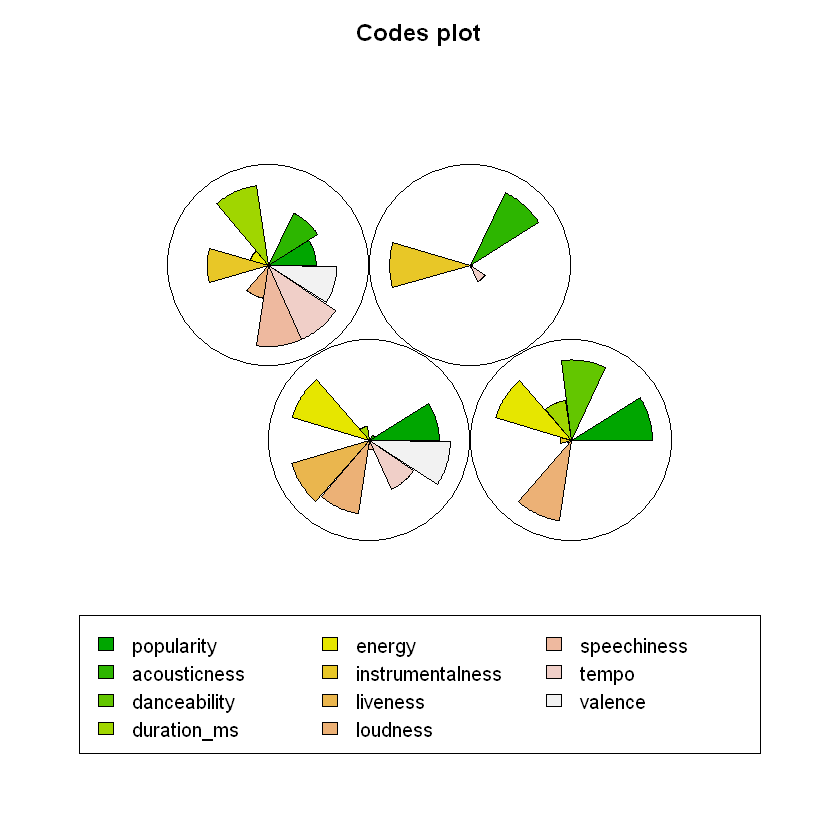

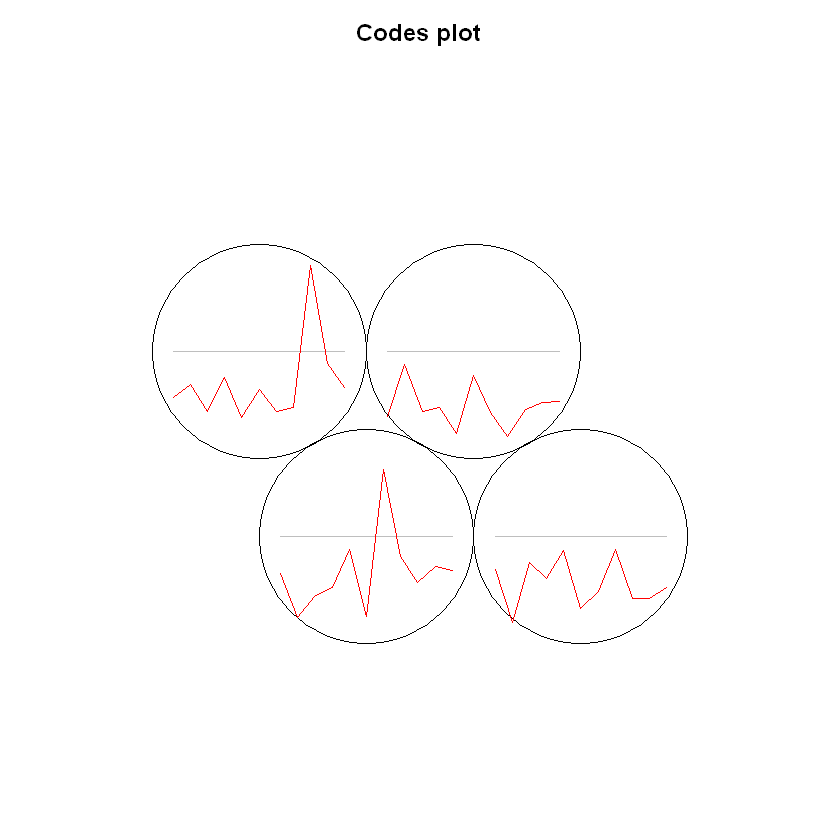

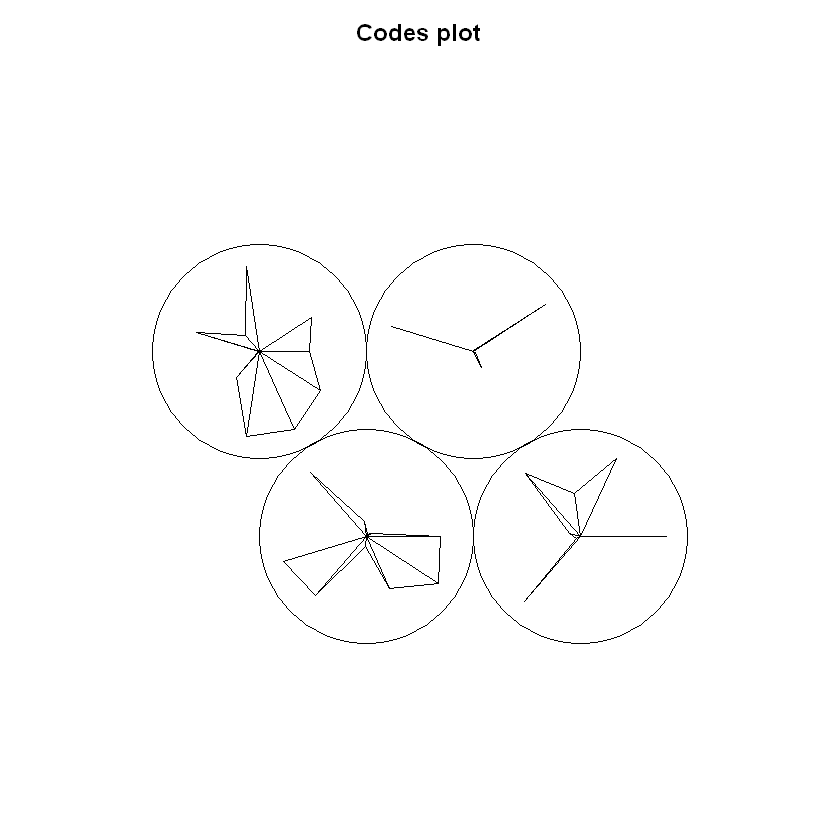

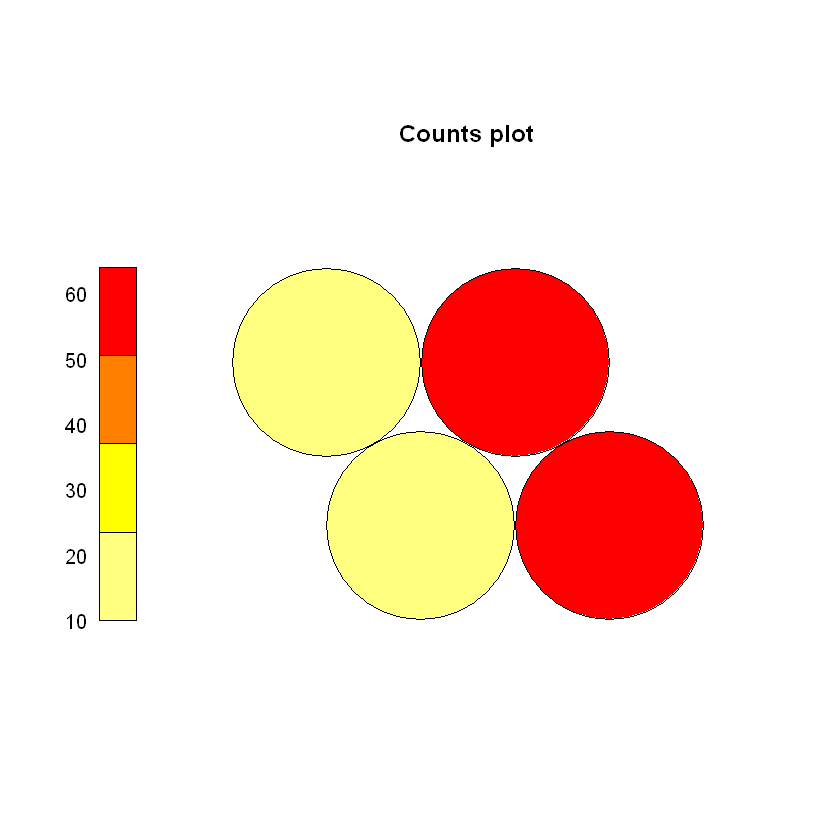

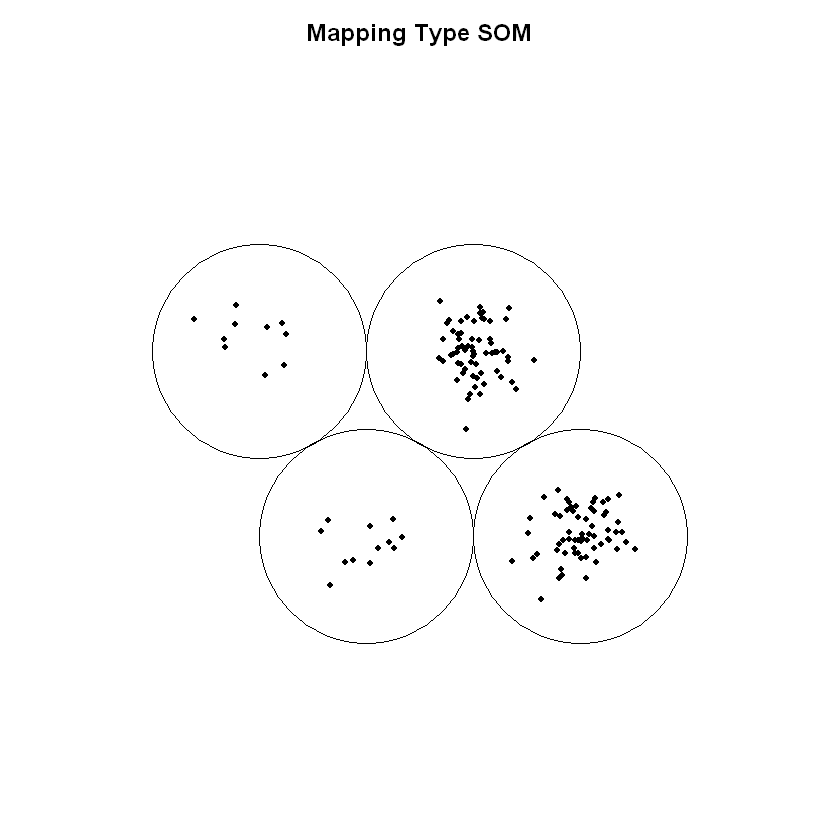

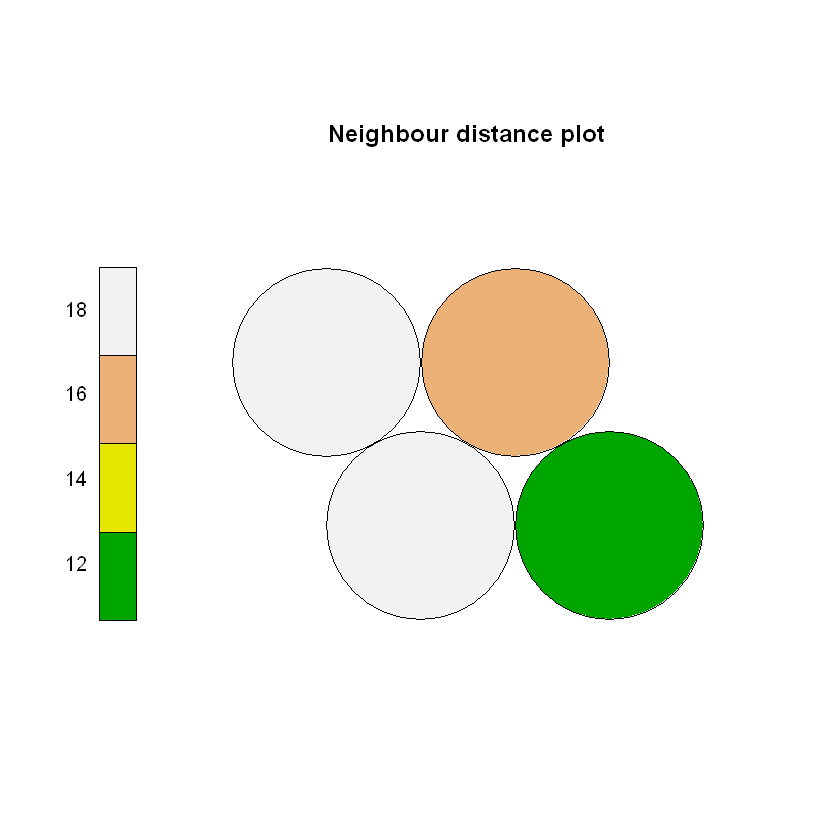

In [12]:
# Convertir el resto de los datos a un marco de datos
#dataMusic <- as.data.frame(dataMusic)
# Normalizar los datos
# Crear un mapa auto-organizado (SOM) con una cuadrícula de 2x2
sommap <- som(scale(dataMusic), rlen=1000, grid = somgrid(2, 2, "hexagonal"))

print(sommap$codes)
plot(sommap, codeRendering="segments")
plot(sommap, codeRendering="lines")
plot(sommap, codeRendering="stars")

plot(sommap, type = "counts", palette.name = colors, heatkey = TRUE)
plot(sommap, type = "mapping", pchs = 20, main = "Mapping Type SOM")
plot(sommap, type = "dist.neighbours", palette.name = terrain.colors)